TEST 1 : 20% data for test, very detail rang

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder
from io import StringIO 

# Charger les données
data = """Rang,Vitesse,Poids,Gravité,FOOS,Air_speed
S+,92,0.07,1.45,7,0.86
S+,92,0.137,2.41,9,1.1
S+,93,0.127,2.06,8,1.1
S,86,0.09,3.85,4,1.208
S,77,0.23,2.402,6,1.11
S,106,0.09,1.725,9,1.134
S,113,0.108,1.55,11,0.89
S,95,0.114,2.145,8,1.302
S,89,0.07,1.595,7,1.029
S-,100,0.098,2.167,7,1.155 
S-,92,0.13,1.54,9,1.281
S-,90,0.125,2.006,4,0.924
S-,62,0.14,1.892,6,0.957
S-,95,0.072,1.672,4,1.092
S-,106,0.08,1.595,6,0.987
S-,104,0.11,1.55,8,0.85
S-,91,0.12,2.077,8,1.0
S-,75,0.08,1.679,3,1.176
S-,97,0.098,1.672,10,1.113
A+,104,0.08,2.046,6,1.344
A+,98,0.087,1.76,3,1.208
A+,90,0.075,1.964,5,1.071
A+,96,0.106,1.85,7,1.037
A+,107,0.107,1.65,6,1.271
A+,108,0.075,1.654,4,1.103
A+,80,0.12,2.31,6,1.26
A+,79,0.108,1.86,12,0.95
A-,79,0.068,1.617,10,0.861
A-,88,0.096,1.749,7,0.966
A-,108,0.09,1.72,7,0.95
A-,85,0.064,1.58,9,0.96
A-,97,0.089,1.43,9,0.89
A-,88,0.18,2.288,8,1.239
A-,103,0.12,1.76,5,1.12
A-,78,0.15,2.42,6,1.155
A-,103,0.12,1.6,6,1.12
A-,94,0.192,1.92,3,1.15
A-,102,0.107,1.602,7,1.155
B+,104,0.12,2.552,10,1.218
B+,94,0.077,1.609,8,1.007
B+,82,0.13,1.619,6,0.977
B+,98,0.092,1.595,9,1.019
B+,95,0.114,2.145,8,1.302
B+,101,0.094,1.84,7,1.01
B+,81,0.12,1.76,6,1.019
B+,94,0.087,1.925,9,1.208
B+,97,0.083,1.65,6,0.77
B-,82,0.062,1.795,8,1.05
B-,91,0.081,1.906,6,1.05
B-,135,0.125,1.971,6,1.155
B-,80,0.11,2.09,7,1.04
B-,96,0.081,1.828,6,0.935
B-,104,0.096,1.534,7,0.924
B-,90,0.075,1.964,5,1.071
B-,62,0.14,1.892,6,1.029
B-,92,0.082,1.53,9,0.83
C+,96,0.09,1.866,6,1.019
C+,94,0.09,1.65,10,1.155
C+,68,0.053,1.271,5,1.332
C+,107,0.09,2.2,11,1.05
C+,104,0.098,1.37,6,0.93
C+,95,0.089,1.265,8,1.05
C+,79,0.082,2.255,9,1.313
C+,116,0.126,1.18,8,0.88
C-,107,0.092,1.507,10,1.134
C-,106,0.11,2.18,9,0.92
C-,86,0.076,1.793,9,1.155
C-,107,0.085,1.52,6,0.94
C-,92,0.078,1.397,6,0.987
C-,127,0.085,1.873,7,1.208
C-,92,0.084,1.705,7,1.281
C-,108,0.092,1.566,7,1.134
D+,88,0.07,1.48,8,1.02
D+,133,0.105,1.485,6,0.945
D+,85,0.071,1.43,6,1.092
D+,79,0.064,1.727,9,0.84
D+,112,0.14,1.72,10,1.0
D+,100,0.106,1.58,8,1.17
D+,98,0.087,1.397792,3,0.9238784
D+,127,0.097,1.496,10,0.735
D-,87,0.09,2.464,3,1.208
D-,118,0.108,1.34,10,0.83
"""
# Charger les données
data2 = """Rang,Vitesse,Poids,Gravité,FOOS,Air_speed
S,92,0.07,1.45,7,0.86
S,92,0.137,2.41,9,1.1
S,93,0.127,2.06,8,1.1
S,86,0.09,3.85,4,1.208
S,77,0.23,2.402,6,1.11
S,106,0.09,1.725,9,1.134
S,113,0.108,1.55,11,0.89
S,95,0.114,2.145,8,1.302
S,89,0.07,1.595,7,1.029
S,100,0.098,2.167,7,1.155 
S,92,0.13,1.54,9,1.281
S,90,0.125,2.006,4,0.924
S,62,0.14,1.892,6,0.957
S,95,0.072,1.672,4,1.092
S,106,0.08,1.595,6,0.987
S,104,0.11,1.55,8,0.85
S,91,0.12,2.077,8,1.0
S,75,0.08,1.679,3,1.176
S,97,0.098,1.672,10,1.113
A,104,0.08,2.046,6,1.344
A,98,0.087,1.76,3,1.208
A,90,0.075,1.964,5,1.071
A,96,0.106,1.85,7,1.037
A,107,0.107,1.65,6,1.271
A,108,0.075,1.654,4,1.103
A,80,0.12,2.31,6,1.26
A,79,0.108,1.86,12,0.95
A,79,0.068,1.617,10,0.861
A,88,0.096,1.749,7,0.966
A,108,0.09,1.72,7,0.95
A,85,0.064,1.58,9,0.96
A,97,0.089,1.43,9,0.89
A,88,0.18,2.288,8,1.239
A,103,0.12,1.76,5,1.12
A,78,0.15,2.42,6,1.155
A,103,0.12,1.6,6,1.12
A,94,0.192,1.92,3,1.15
A,102,0.107,1.602,7,1.155
B,104,0.12,2.552,10,1.218
B,94,0.077,1.609,8,1.007
B,82,0.13,1.619,6,0.977
B,98,0.092,1.595,9,1.019
B,95,0.114,2.145,8,1.302
B,101,0.094,1.84,7,1.01
B,81,0.12,1.76,6,1.019
B,94,0.087,1.925,9,1.208
B,97,0.083,1.65,6,0.77
B,82,0.062,1.795,8,1.05
B,91,0.081,1.906,6,1.05
B,135,0.125,1.971,6,1.155
B,80,0.11,2.09,7,1.04
B,96,0.081,1.828,6,0.935
B,104,0.096,1.534,7,0.924
B,90,0.075,1.964,5,1.071
B,62,0.14,1.892,6,1.029
B,92,0.082,1.53,9,0.83
C,96,0.09,1.866,6,1.019
C,94,0.09,1.65,10,1.155
C,68,0.053,1.271,5,1.332
C,107,0.09,2.2,11,1.05
C,104,0.098,1.37,6,0.93
C,95,0.089,1.265,8,1.05
C,79,0.082,2.255,9,1.313
C,116,0.126,1.18,8,0.88
C,107,0.092,1.507,10,1.134
C,106,0.11,2.18,9,0.92
C,86,0.076,1.793,9,1.155
C,107,0.085,1.52,6,0.94
C,92,0.078,1.397,6,0.987
C,127,0.085,1.873,7,1.208
C,92,0.084,1.705,7,1.281
C,108,0.092,1.566,7,1.134
D,88,0.07,1.48,8,1.02
D,133,0.105,1.485,6,0.945
D,85,0.071,1.43,6,1.092
D,79,0.064,1.727,9,0.84
D,112,0.14,1.72,10,1.0
D,100,0.106,1.58,8,1.17
D,98,0.087,1.397792,3,0.9238784
D,127,0.097,1.496,10,0.735
D,87,0.09,2.464,3,1.208
D,118,0.108,1.34,10,0.83
"""


# Créer un dataframe pandas à partir des données
df = pd.read_csv(StringIO(data))  # Utilisez StringIO directement

# Diviser les données en features (X) et labels (y)
X = df.drop('Rang', axis=1)
y = df['Rang']

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier(max_depth=20)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les labels sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy * 100:.2f}%')

# Afficher l'arbre de décision sous forme de texte
tree_rules = export_text(model, feature_names=list(X.columns))
#print(tree_rules) #A RETIRER POUR VOIR LE TREE 

Précision du modèle : 5.88%


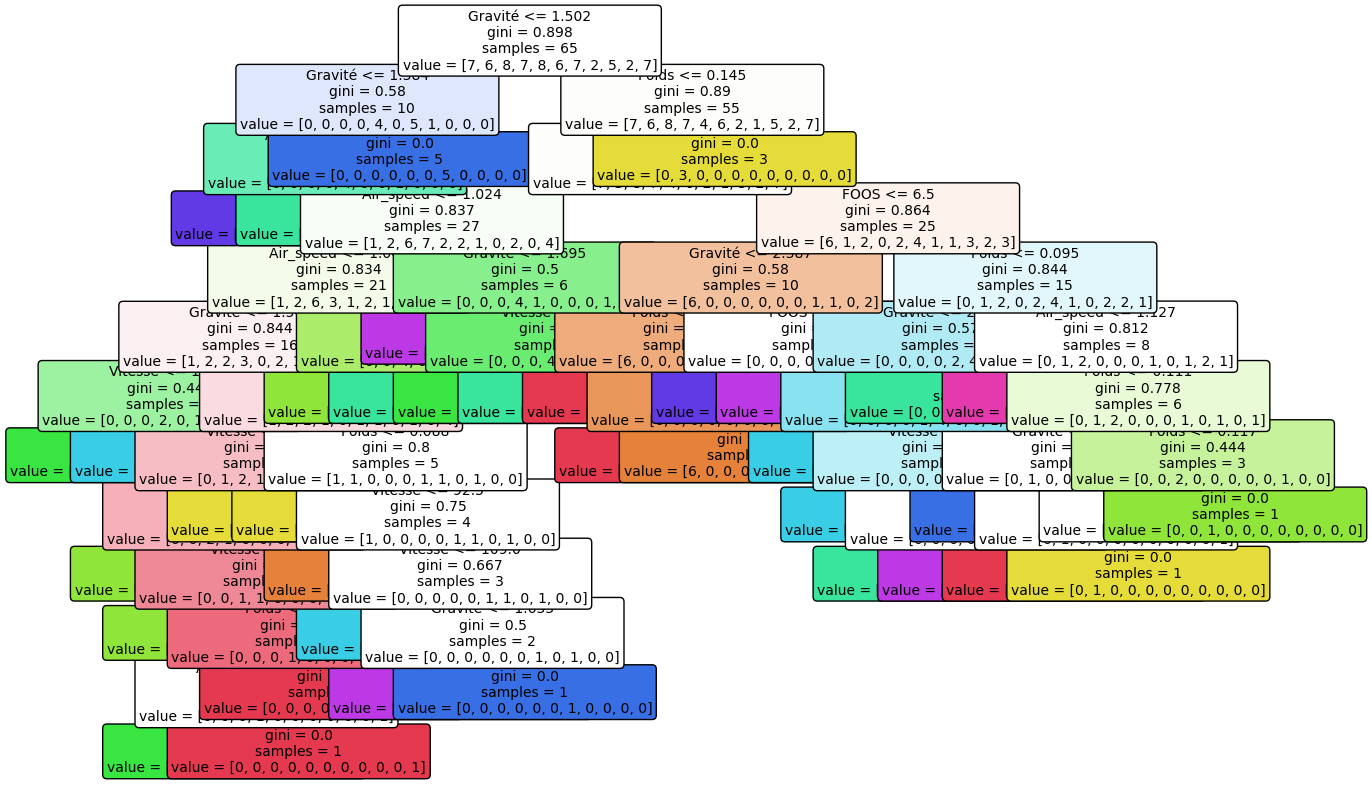

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Créer le modèle d'arbre de décision avec la profondeur spécifiée (vous pouvez ajuster la profondeur selon vos besoins)
model = DecisionTreeClassifier(max_depth=14)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Afficher l'arbre de décision avec matplotlib
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True, fontsize=10)
plt.show()


TEST 2 : 5% test data, very detail tree

In [68]:
# Créer un dataframe pandas à partir des données
df = pd.read_csv(StringIO(data))  # Utilisez StringIO directement

# Diviser les données en features (X) et labels (y)
X = df.drop('Rang', axis=1)
y = df['Rang']

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier(max_depth=20)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les labels sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy * 100:.2f}%')

# Afficher l'arbre de décision sous forme de texte
tree_rules = export_text(model, feature_names=list(X.columns))
#print(tree_rules) #A RETIRER POUR VOIR LE TREE 

Précision du modèle : 20.00%


TEST 3 : 20% test data, low detail tree

In [78]:
# Créer un dataframe pandas à partir des données
df2 = pd.read_csv(StringIO(data2))  # Utilisez StringIO directement

# Diviser les données en features (X) et labels (y)
X = df2.drop('Rang', axis=1)
y = df2['Rang']

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier(max_depth=20)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les labels sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy * 100:.2f}%')

# Afficher l'arbre de décision sous forme de texte
tree_rules = export_text(model, feature_names=list(X.columns))
#print(tree_rules) #A RETIRER POUR VOIR LE TREE 

Précision du modèle : 23.53%


TEST 4 : 5% test data, low detail tree

In [89]:
# Créer un dataframe pandas à partir des données
df2 = pd.read_csv(StringIO(data2))  # Utilisez StringIO directement

# Diviser les données en features (X) et labels (y)
X = df2.drop('Rang', axis=1)
y = df2['Rang']

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Créer le modèle d'arbre de décision
model = DecisionTreeClassifier(max_depth=20)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les labels sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Précision du modèle : {accuracy * 100:.2f}%')

# Afficher l'arbre de décision sous forme de texte
tree_rules = export_text(model, feature_names=list(X.columns))
#print(tree_rules) #A RETIRER POUR VOIR LE TREE 

Précision du modèle : 20.00%
